Bi-directional Encoder Representation from Transformers (BERT)

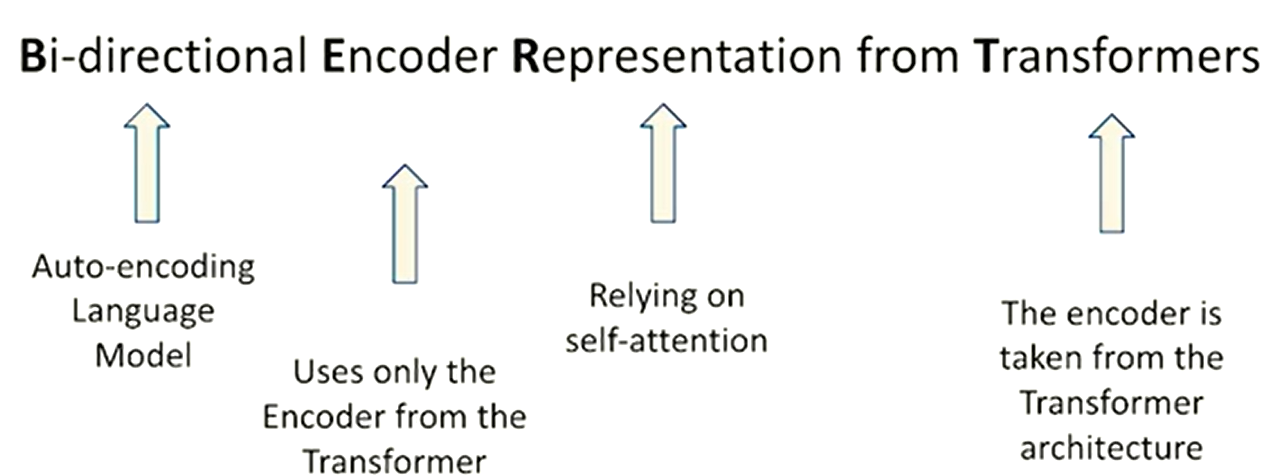

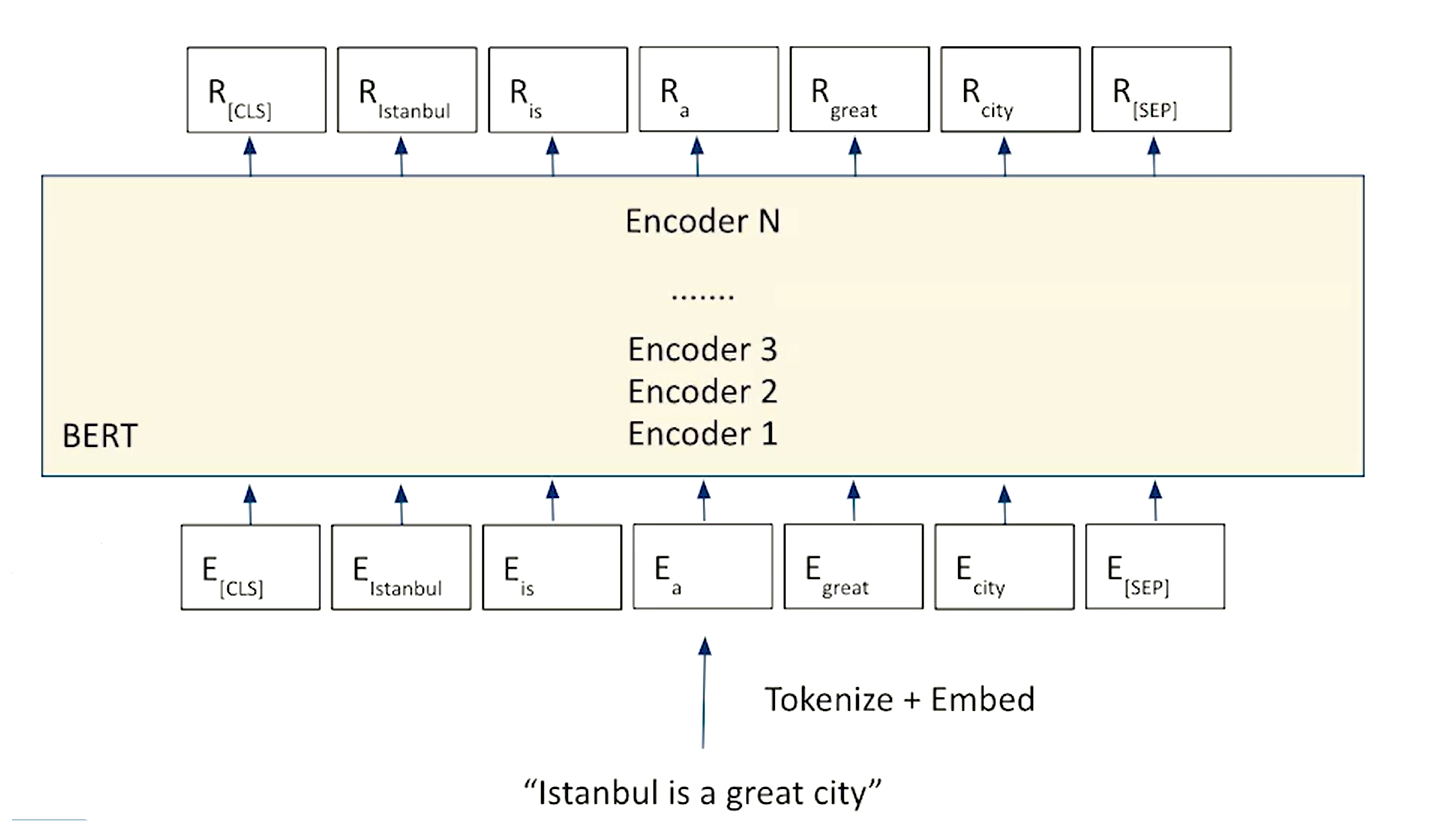

The [CLS] ("classification")  token is used to represent the entire input in one vector, can be used for classification tasks, Sentiment Analysis.

The [SEP] ("separator") token respresent a speration between two sequences

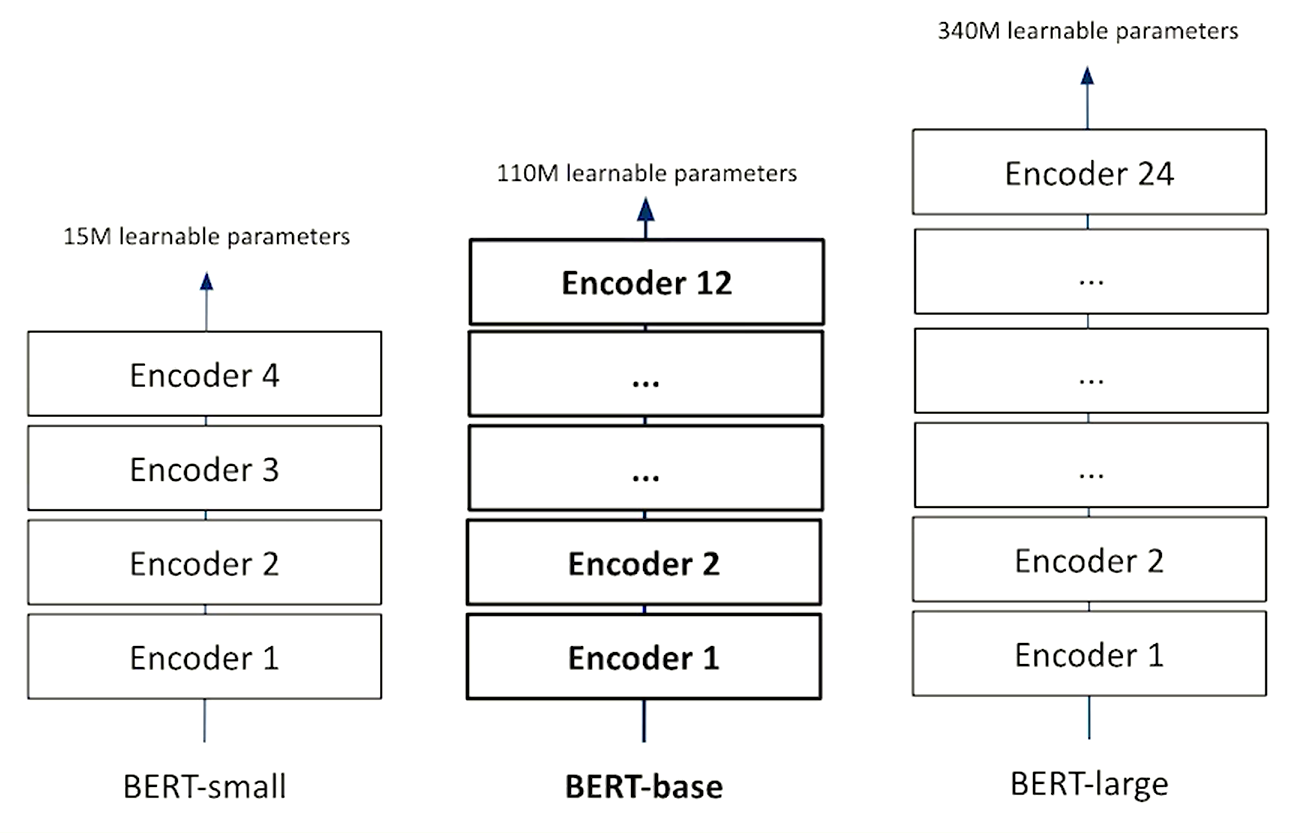

In [1]:
import torch
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
model_name = "bert-base-uncased"
model = BertModel.from_pretrained(model_name)

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [56]:
named_params = list(model.named_parameters())

print('The BERT model has {} different named parameters.\n'.format(len(named_params)))

# 30522 vocabulary terms each with a dimension of 768 

print(f'Length of BERT base vocabulary: {len(tokenizer.vocab)}')

The BERT model has 199 different named parameters.

Length of BERT base vocabulary: 30522


In [31]:
print("Embedding Layer\n")
for p in named_params[0:5]:
    print("{:<55} {:>12}".format(p[0],str(tuple(p[1].size()))))
    
print("\nFirst Encoder\n")
for p in named_params[5:21]:
    print("{:<55} {:>12}".format(p[0],str(tuple(p[1].size()))))    
    
print("\nOutput Layer\n")
for p in named_params[-2:]:
    print("{:<55} {:>12}".format(p[0],str(tuple(p[1].size()))))    

Embedding Layer

embeddings.word_embeddings.weight                       (30522, 768)
embeddings.position_embeddings.weight                     (512, 768)
embeddings.token_type_embeddings.weight                     (2, 768)
embeddings.LayerNorm.weight                                   (768,)
embeddings.LayerNorm.bias                                     (768,)

First Encoder

encoder.layer.0.attention.self.query.weight               (768, 768)
encoder.layer.0.attention.self.query.bias                     (768,)
encoder.layer.0.attention.self.key.weight                 (768, 768)
encoder.layer.0.attention.self.key.bias                       (768,)
encoder.layer.0.attention.self.value.weight               (768, 768)
encoder.layer.0.attention.self.value.bias                     (768,)
encoder.layer.0.attention.output.dense.weight             (768, 768)
encoder.layer.0.attention.output.dense.bias                   (768,)
encoder.layer.0.attention.output.LayerNorm.weight             (768,)
e

The pooler is a separate linear and tanh activated layer that acts on the `[CLS] ` token 's representation

This pooled output is often used as a representation fbr the entire sentence.

Example of how the [CLS] token can be used during fine-tuning for NLP tasks like classification:

Assume outputs is the output from BERT for the entire input sequence
       
       pooled_output = outputs.pooler_output`

For a binary classification task
       
       classifier_output = classification_layer(pooled_output)

In [3]:
tokenizer = BertTokenizer.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [72]:
text = "Agney really loves Pokemon, Lucario is his favorite."
tokenizer.encode(text)

# 102 -> [CLS] and 102 -> [SEP]

[101,
 12943,
 5420,
 2428,
 7459,
 20421,
 1010,
 15604,
 9488,
 2003,
 2010,
 5440,
 1012,
 102]

In [36]:
# Pass a sample text through BERT model
response = model(torch.tensor(tokenizer.encode(text)).unsqueeze(0))

In [37]:
response

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.4610,  0.0386, -0.0475,  ..., -0.0354,  0.5843,  0.2153],
         [-0.3515, -0.4301,  1.0822,  ..., -0.4654,  0.1369,  0.1690],
         [-0.7530, -0.2965,  0.0595,  ..., -0.5320,  0.2695, -0.3940],
         [ 0.6903,  0.4261,  0.4265,  ...,  0.2218,  0.6973, -0.1172],
         [-0.1252, -0.5701, -0.4699,  ...,  0.3901,  0.6424, -0.2264],
         [ 0.7551, -0.1806, -0.3154,  ...,  0.2346, -0.6774, -0.3297]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[-8.5915e-01, -5.7720e-01, -8.8789e-01,  7.8857e-01,  7.3118e-01,
         -2.3990e-01,  9.1075e-01,  4.8456e-01, -7.1365e-01, -9.9999e-01,
         -5.8878e-01,  8.9429e-01,  9.8938e-01,  4.1844e-01,  9.0363e-01,
         -7.7058e-01, -3.7092e-01, -7.0016e-01,  5.4516e-01, -5.3321e-01,
          8.1753e-01,  9.9999e-01, -5.9314e-02,  3.9932e-01,  6.0751e-01,
          9.8310e-01, -8.8356e-01,  9.1540e-01,  9.4712e-01,  7.5509e-01,
       

In [39]:
response.last_hidden_state

tensor([[[-0.4610,  0.0386, -0.0475,  ..., -0.0354,  0.5843,  0.2153],
         [-0.3515, -0.4301,  1.0822,  ..., -0.4654,  0.1369,  0.1690],
         [-0.7530, -0.2965,  0.0595,  ..., -0.5320,  0.2695, -0.3940],
         [ 0.6903,  0.4261,  0.4265,  ...,  0.2218,  0.6973, -0.1172],
         [-0.1252, -0.5701, -0.4699,  ...,  0.3901,  0.6424, -0.2264],
         [ 0.7551, -0.1806, -0.3154,  ...,  0.2346, -0.6774, -0.3297]]],
       grad_fn=<NativeLayerNormBackward0>)

In [44]:
# The pooler output
print(response.pooler_output)
print(response.pooler_output.shape)
model.pooler

tensor([[-8.5915e-01, -5.7720e-01, -8.8789e-01,  7.8857e-01,  7.3118e-01,
         -2.3990e-01,  9.1075e-01,  4.8456e-01, -7.1365e-01, -9.9999e-01,
         -5.8878e-01,  8.9429e-01,  9.8938e-01,  4.1844e-01,  9.0363e-01,
         -7.7058e-01, -3.7092e-01, -7.0016e-01,  5.4516e-01, -5.3321e-01,
          8.1753e-01,  9.9999e-01, -5.9314e-02,  3.9932e-01,  6.0751e-01,
          9.8310e-01, -8.8356e-01,  9.1540e-01,  9.4712e-01,  7.5509e-01,
         -6.3575e-01,  3.6704e-01, -9.9376e-01, -2.9554e-01, -9.4123e-01,
         -9.9643e-01,  6.0210e-01, -7.6052e-01,  9.2123e-03, -1.2988e-01,
         -8.8854e-01,  5.2926e-01,  9.9999e-01, -1.0457e-02,  4.7660e-01,
         -3.8155e-01, -1.0000e+00,  3.3741e-01, -9.0030e-01,  8.1940e-01,
          7.7540e-01,  7.3036e-01,  1.7571e-01,  5.1628e-01,  5.5738e-01,
         -2.8111e-01,  9.1777e-02,  2.0617e-01, -3.4628e-01, -6.8838e-01,
         -6.5081e-01,  5.3280e-01, -8.0747e-01, -9.2509e-01,  8.4305e-01,
          7.0633e-01, -3.8150e-01, -4.

BertPooler(
  (dense): Linear(in_features=768, out_features=768, bias=True)
  (activation): Tanh()
)

In [42]:
# grab the final encoder's representation of the CLS token / Getting only the pooler output
CLS_embedding = response.last_hidden_state[:,0,:]

print(CLS_embedding.shape)

CLS_embedding = CLS_embedding.unsqueeze(0)
print(CLS_embedding.shape)

torch.Size([1, 768])
torch.Size([1, 1, 768])


In [43]:
model.pooler(CLS_embedding).shape

torch.Size([1, 768])

In [45]:
(model.pooler(CLS_embedding) == response.pooler_output).all()

tensor(True)

In [49]:
total_params = 0
for i in model.parameters():
    if len(i.shape) == 2:
        total_params += i.shape[0] * i.shape[1]
        
print (f' Total Parameters: {total_params:,} ' )        

 Total Parameters: 109,360,128 


### Tokenization

In [51]:
'Agney' in tokenizer.vocab

False

BERT's tokenizer is great at handling tokens that are OOV (out of
vocabulary) by breaking them up into smaller chunks of known
tokens.

"##" indicates a subword. 

BERT has a maximum sequence length of `512 tokens`. Any sequence less than 512 tokens it will be padded to reach 512 and if it is over 512, the model may error out

Tokenization can be cased or uncased the model we used above is uncased ("bert-base-uncased"). Cased tokenization works well in cases where case does
matter (like Named Entity Recognition)

Uncased - Removes accents and lower-cases the input (Café Dupont --> cafe dupont)

Cased   - Does nothing to the input

In [61]:
tokens_sen_1 = tokenizer.encode('I love my pet Python')
tokens_sen_1

[101, 1045, 2293, 2026, 9004, 18750, 102]

In [62]:
tokenizer.decode(tokens_sen_1)

'[CLS] i love my pet python [SEP]'

In [73]:
text = "Agney really loves Pokemon, Lucario is his favorite."
tokens_sen_2 = tokenizer.encode(text)
tokens_sen_2

[101,
 12943,
 5420,
 2428,
 7459,
 20421,
 1010,
 15604,
 9488,
 2003,
 2010,
 5440,
 1012,
 102]

In [74]:
print(f'Text: {text}. Num tokens: {len(tokens_sen_2)}')
for t in tokens_sen_2:
    print(f'Token: {t} subword: {tokenizer.decode((t))}')

Text: Agney really loves Pokemon, Lucario is his favorite.. Num tokens: 14
Token: 101 subword: [ C L S ]
Token: 12943 subword: a g
Token: 5420 subword: # # n e y
Token: 2428 subword: r e a l l y
Token: 7459 subword: l o v e s
Token: 20421 subword: p o k e m o n
Token: 1010 subword: ,
Token: 15604 subword: l u c a
Token: 9488 subword: # # r i o
Token: 2003 subword: i s
Token: 2010 subword: h i s
Token: 5440 subword: f a v o r i t e
Token: 1012 subword: .
Token: 102 subword: [ S E P ]


In [77]:
gb_text = tokenizer.encode("Gibberishoafhkjd 404 doesnotexist")
print(f'Text: {"Gibberishoafhkjd 404 doesnotexist"}. Num tokens: {len(gb_text)}')
for t in gb_text:
    print(f'Token: {t} subword: {tokenizer.decode((t))}')

Text: Gibberishoafhkjd 404 doesnotexist. Num tokens: 16
Token: 101 subword: [ C L S ]
Token: 21025 subword: g i
Token: 29325 subword: # # b b e r
Token: 4509 subword: # # i s h
Token: 10441 subword: # # o a
Token: 2546 subword: # # f
Token: 2232 subword: # # h
Token: 2243 subword: # # k
Token: 3501 subword: # # j
Token: 2094 subword: # # d
Token: 24837 subword: 4 0 4
Token: 2987 subword: d o e s n
Token: 12184 subword: # # o t e
Token: 9048 subword: # # x i
Token: 3367 subword: # # s t
Token: 102 subword: [ S E P ]


In [78]:
# encode_plus gives us token ids, attention mask and segment ids (When there is two sequences passed to the model, A vs B) .
tokens = tokenizer.encode_plus(text)
print(tokens)

{'input_ids': [101, 12943, 5420, 2428, 7459, 20421, 1010, 15604, 9488, 2003, 2010, 5440, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [79]:
tokenizer(text)

{'input_ids': [101, 12943, 5420, 2428, 7459, 20421, 1010, 15604, 9488, 2003, 2010, 5440, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [85]:
python_pet = tokenizer.encode('I love my pet python')
python_language = tokenizer.encode('I love coding in python')

python_pet_embedding = model(torch.tensor(python_pet).unsqueeze(0))[0][:,5,:].detach().numpy()
python_language_embedding = model(torch.tensor(python_language).unsqueeze(0))[0][:,5,:].detach().numpy()

snake_alone_embedding = model(torch.tensor(tokenizer.encode('snake')).unsqueeze(0))[0][:,1,:].detach().numpy()
programming_alone_embedding = model(torch.tensor(tokenizer.encode('programming')).unsqueeze(0))[0][:,1,:].detach().numpy()

In [88]:
print(python_pet_embedding.shape)

(1, 768)


In [91]:
print(cosine_similarity(python_pet_embedding,snake_alone_embedding))
print(cosine_similarity(python_pet_embedding,programming_alone_embedding))
print(cosine_similarity(python_language_embedding,snake_alone_embedding))
print(cosine_similarity(python_language_embedding,programming_alone_embedding))
print(cosine_similarity(snake_alone_embedding,programming_alone_embedding))

[[0.69286543]]
[[0.49864358]]
[[0.58434784]]
[[0.5614742]]
[[0.62740517]]


#### BERT Embeddings

**`1. Token Embeddings:`**

Token embeddings are the initial representations of words in the input sequence. Each word is represented as a fixed-size vector, often determined by the model's vocabulary size. BERT uses WordPiece tokenization.

This is  learnable

**`2. Segment Embeddings:`**

In tasks like question answering or natural language inference, where two segments need to be considered, BERT uses segment embeddings.Typically, one segment is assigned a segment embedding of 0, and the other is assigned a segment embedding of 1.

This is not learnable

**`3. Position Embeddings:`**

The transformer architecture itself is not inherently aware of the order of tokens in a sequence, as it processes all tokens in parallel. Position embeddings are added to the token embeddings to provide information about the position of each token in the sequence.

This is not learnable

BERT needs a sense of token positions like RNNs/LSTMs. 

A combination of sine and cosine waves to indicate a token's position in the sequence

Position embeddings in BERT are crucial for providing information about the position or order of tokens within a sequence. The transformer architecture, which underlies BERT, doesn't inherently capture the sequential order of tokens since it processes all tokens in parallel. Position embeddings are added to the token embeddings to incorporate positional information into the model's representations.

Here's how position embeddings are calculated in BERT:

**Embedding Size:**
   - The embedding size represents the dimensionality of the embeddings. In BERT, the typical embedding size is 768.
      
   $\text{max_sequence_length} $ is 512

**Positional Encoding Formula:**
   - The position embedding for each position ${p_{ij}}$ in the sequence is calculated using the following formula:       

## $$
{p_{ij}} = 
\begin{cases}
  \sin\left(\frac{\text{i}}{{10000}^{\frac{j}{d}}}\right)  & \text{if } j \text{ is even} \\
  \cos\left(\frac{\text{i}}{{10000}^{\frac{j}{d}}}\right) & \text{if } j \text{ is odd}
\end{cases}
$$
     
   where:
   
*    $\text{i}$ is the position of the token in the sequence.
 
*    $j$ is the dimension index of the embedding (between 0 and 768 for BERT-base)
   
*    $d$ is the embedding size.


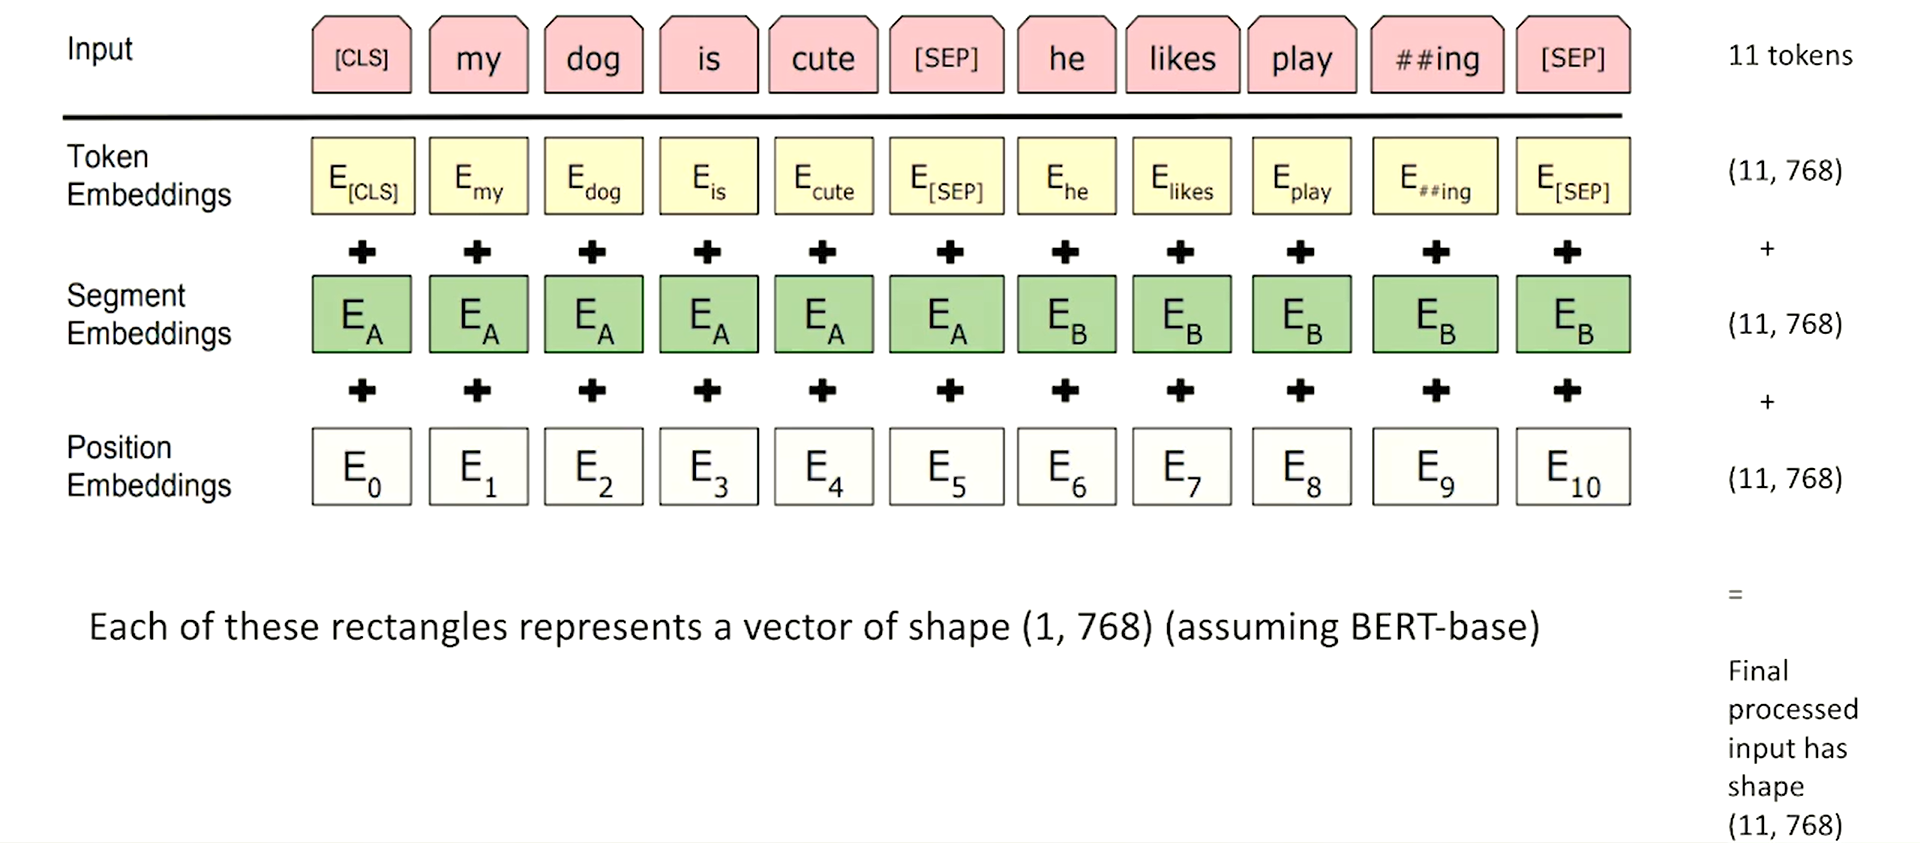

In [4]:
model.embeddings

BertEmbeddings(
  (word_embeddings): Embedding(30522, 768, padding_idx=0)
  (position_embeddings): Embedding(512, 768)
  (token_type_embeddings): Embedding(2, 768)
  (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
  (dropout): Dropout(p=0.1, inplace=False)
)

In [6]:
example_phrase = 'Hello World, This is Agney'

tokenizer.encode(example_phrase, return_tensors='pt')

tensor([[  101,  7592,  2088,  1010,  2023,  2003, 12943,  5420,   102]])

In [18]:
word_embedding = model.embeddings.word_embeddings(tokenizer.encode(example_phrase, return_tensors='pt' ))
word_embedding

tensor([[[ 0.0136, -0.0265, -0.0235,  ...,  0.0087,  0.0071,  0.0151],
         [-0.0043, -0.0330, -0.0217,  ..., -0.0425, -0.0127, -0.0389],
         [ 0.0244,  0.0322,  0.0024,  ..., -0.0424, -0.0054, -0.0284],
         ...,
         [-0.0228, -0.0096, -0.0338,  ..., -0.0581,  0.0315,  0.0294],
         [-0.0696, -0.0777, -0.0729,  ...,  0.0078, -0.0126, -0.0383],
         [-0.0145, -0.0100,  0.0060,  ..., -0.0250,  0.0046, -0.0015]]],
       grad_fn=<EmbeddingBackward0>)

In [11]:
model.embeddings.position_embeddings

Embedding(512, 768)

In [14]:
tokenizer.encode(example_phrase, return_tensors='pt').shape

torch.Size([1, 9])

In [16]:
# Position Embeddings for our exmaple phrase, sin and cosine values
positional_embedding = model.embeddings.position_embeddings(torch.LongTensor(range(9)))
positional_embedding

tensor([[ 1.7505e-02, -2.5631e-02, -3.6642e-02,  ...,  3.3437e-05,
          6.8312e-04,  1.5441e-02],
        [ 7.7580e-03,  2.2613e-03, -1.9444e-02,  ...,  2.8910e-02,
          2.9753e-02, -5.3247e-03],
        [-1.1287e-02, -1.9644e-03, -1.1573e-02,  ...,  1.4908e-02,
          1.8741e-02, -7.3140e-03],
        ...,
        [ 6.4257e-03, -1.7664e-02, -2.2067e-02,  ...,  6.7531e-04,
          1.1108e-02,  3.7521e-03],
        [ 6.2613e-04, -1.6089e-02, -7.6365e-03,  ...,  5.3390e-03,
          1.5909e-02,  1.8119e-03],
        [ 2.0350e-03, -1.4569e-02, -1.4560e-02,  ...,  1.4465e-02,
          1.0401e-02,  3.7587e-03]], grad_fn=<EmbeddingBackward0>)

In [19]:
# Segment Embeddings for our exmaple phrase 
# All tokens have the same embedding
segment_embedding = model.embeddings.token_type_embeddings(torch.LongTensor([0]*9))
segment_embedding

tensor([[ 0.0004,  0.0110,  0.0037,  ..., -0.0066, -0.0034, -0.0086],
        [ 0.0004,  0.0110,  0.0037,  ..., -0.0066, -0.0034, -0.0086],
        [ 0.0004,  0.0110,  0.0037,  ..., -0.0066, -0.0034, -0.0086],
        ...,
        [ 0.0004,  0.0110,  0.0037,  ..., -0.0066, -0.0034, -0.0086],
        [ 0.0004,  0.0110,  0.0037,  ..., -0.0066, -0.0034, -0.0086],
        [ 0.0004,  0.0110,  0.0037,  ..., -0.0066, -0.0034, -0.0086]],
       grad_fn=<EmbeddingBackward0>)

In [20]:
# Get our final BERT embedding by adding all the embeddings
model.embeddings.LayerNorm(
    word_embedding + positional_embedding + segment_embedding
)

tensor([[[ 0.1686, -0.2858, -0.3261,  ..., -0.0276,  0.0383,  0.1640],
         [ 0.3739, -0.0156, -0.2456,  ..., -0.0317,  0.5514, -0.5241],
         [ 0.4862,  0.9353,  0.1882,  ..., -0.3083,  0.4421, -0.4835],
         ...,
         [ 0.1316,  0.1252, -0.3887,  ..., -0.5782,  1.0326,  0.8707],
         [-0.7294, -0.9260, -0.7593,  ...,  0.4675,  0.4638, -0.2756],
         [-0.2306, -0.2416, -0.0409,  ..., -0.2855,  0.2437, -0.0705]]],
       grad_fn=<NativeLayerNormBackward0>)

In [24]:
model.embeddings(tokenizer.encode(example_phrase,return_tensors='pt'))

tensor([[[ 0.1686, -0.2858, -0.3261,  ..., -0.0276,  0.0383,  0.1640],
         [ 0.3739, -0.0156, -0.2456,  ..., -0.0317,  0.5514, -0.5241],
         [ 0.4862,  0.9353,  0.1882,  ..., -0.3083,  0.4421, -0.4835],
         ...,
         [ 0.1316,  0.1252, -0.3887,  ..., -0.5782,  1.0326,  0.8707],
         [-0.7294, -0.9260, -0.7593,  ...,  0.4675,  0.4638, -0.2756],
         [-0.2306, -0.2416, -0.0409,  ..., -0.2855,  0.2437, -0.0705]]],
       grad_fn=<NativeLayerNormBackward0>)

In [25]:
model.embeddings(tokenizer.encode(example_phrase,return_tensors='pt')).shape

torch.Size([1, 9, 768])

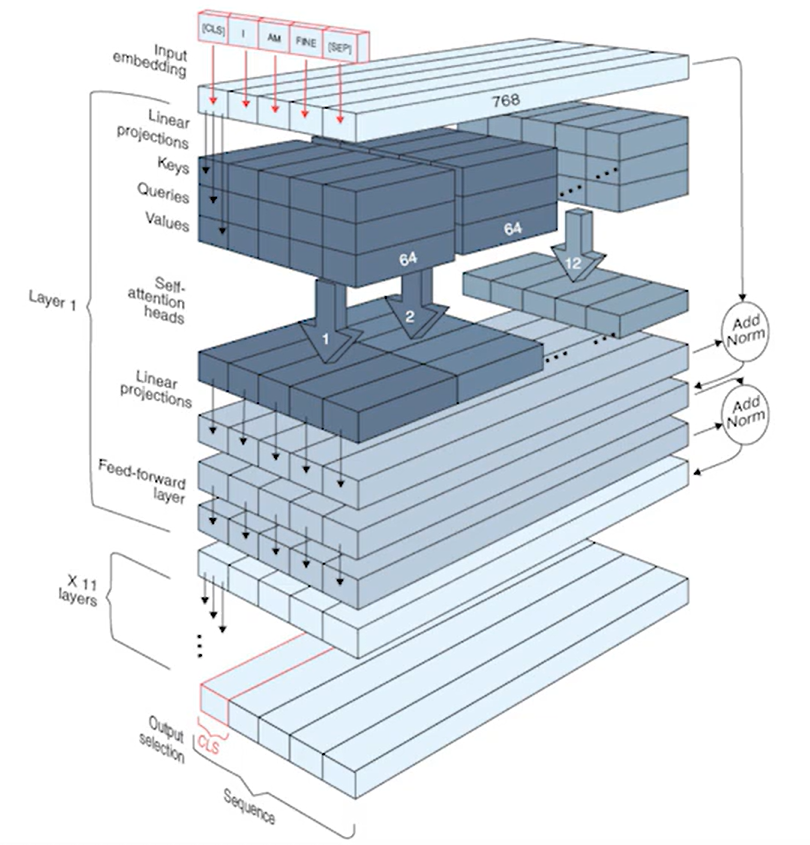